## Phase 2.13

# Statistical Test & Central Limit Theorem

## Objectives
- Statistical Test
    - Setting up Hypothesis
    - OneSample Z-Test
- Central Limit Theorem
- Sampling (Standard Error)
- Confidence Intervals
- T-Distribution

# Statistical Test

## Process
1. Set up Hypothesis
2. Pick the statistical test based on your experiment.
3. Pick your alpha ($\alpha$)
4. Calculate your test-statistic.
5. Find your p-value.
6. Interpret your results.

### Our Objective
We want to examine if there is an effect on IQ scores when using tutors.

To analyze this, you conduct IQ tests on a sample of 40 students and want to compare those students' IQ to the general population IQ.

We have information on the standardized IQ test as well as the results of the tutored students below.

### Our Data

- Population
    - $\large \mu$ = 100
    - $\large \sigma$ = 16
    
    
- Sample
    - $\large \bar{x}$ = 103
    - $\large n$ = 40
    
    
---

***Based on the data, does tutoring have an effect?***

### 1. Set up Hypothesis
- Every experiment begins with two hypotheses - a **null hypothesis** and an **alternative hypothesis**.
    - The null hypothesis represents no effect.


- *One-tailed / two tailed?*


- Our results will be either:
    1. *We **reject** the null hypothesis.*
    2. *We **fail to reject** the null hypothesis.*
    
---

*Our hypotheses:*

(Null Hypothesis)
- $\large H_0: \bar{x} = \mu$
    - "*Tutoring has no effect on IQ score.*"

(Alternative Hypothesis)
- $\large H_A: \bar{x} \gt \mu$
    - "*Tutored students have a higher IQ score than non-tutored students.*"

### 2 - 3. Pick the Test & Alpha
#### 2. Pick the Test
- We will select a **one-sample z-test**
    - *One-Sample Z-Test Conditions:*
        1. You know the population mean ($\mu$)
        2. You know the population standard deviation ($\sigma$)

#### 3. Pick the Alpha 
- **Alpha** ($\alpha$) is your *cut-off value* - the **threshold for rejecting your null hypothesis**.
    - *Standard is $\large \alpha = 0.05$*
    - *Confidence Level* is defined as $\large 1 - \alpha$.
        - *Standard confidence level therefore is 0.95 (or 95%).*
        
        
> *An example interpretation of your test results could be: **With a confidence level of 95%, we can reject the null-hypothesis that [...]**.*

#### *Cheat Sheets*
##### *What kind of test?*
| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|

---
##### *How to run the test?*
| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
| One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
| Factorial DOE with one factor and one blocking variable | | Friedman test  | | 

### 4 - 5. Calculate the Test Statistic & P-Value

#### 4. Calculate the Test Statistic
- For a Z-Test, the Z-Score is our test-statistic.

$\LARGE z = \frac{(\bar{x} - \mu)}{\frac{\sigma}{\sqrt{n}}} = \frac{(103 - 100)}{\frac{16}{\sqrt{40}}} = \frac{3}{2.53}$

<!-- Changed to one-line above
$\LARGE = \frac{(103 - 100)}{\frac{16}{\sqrt{40}}}$
$\LARGE = \frac{3}{2.53}$
 -->
 
$\LARGE z = 1.19$

#### 5. Calculate the P-Value

- Look up the associated probability from the <a href='https://www.ztable.net/'>*Z-TABLE*</a>
    - Associated probability: $\large 0.883$
    - *Average IQ of tutored students is greater than $88\%$ of the population.*


- For a right-tailed test, the p-value is $\large 1 - 0.883 = 0.12$, which is greater than our alpha of $0.05$.

## 5. Interpret
<img src='images/interpret.png' width=600>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

np.random.seed(2021)
plt.style.use('seaborn-talk')

In [2]:
# Running in base python.
def calculate_one_sample_ztest(pop_mean, pop_std, sam_mean, sam_n, alpha=0.05):
    """Print out results from a one-sample z-test."""
    
    z_score = (sam_mean - pop_mean) / (pop_std / np.sqrt(sam_n))
    p_value = 1 - (round(stats.norm.cdf(z_score), 2))
    
    results = 'larger' if p_value > alpha else 'smaller'
    print(f'The z-score of this test is {round(z_score, 2)}.')
    print(f'The p-value of this test is {p_value}.')
    print(f'\tThis is {results} than the given alpha of {alpha}.')

In [3]:
calculate_one_sample_ztest(
    pop_mean=100, 
    pop_std=16, 
    sam_mean=103, 
    sam_n=40
)

The z-score of this test is 1.19.
The p-value of this test is 0.12.
	This is larger than the given alpha of 0.05.


### Note
- *This and other tests can be run directly in **Python** (in `scipy` or `statsmodels`) where, rather than inputing the descriptive statistics, you input the actual sample/population data (often in the form of a `pandas.Series`.*

# Central Limit Theorem
- *Independent random variables summed together will converge to a normal distribution as the number of samples increases.*

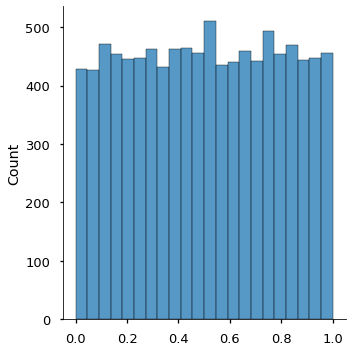

In [4]:
# Create a dataset without a normal distribution.
dataset = np.random.uniform(size=10_000)
sns.displot(dataset);

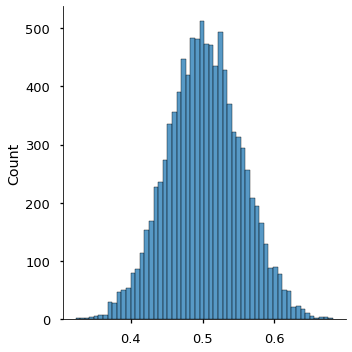

In [5]:
# Sample dataset into groups of 30 and find the means of those samples.
resampled_dataset = [np.mean(np.random.choice(dataset, size=30)) 
                     for _ in range(10_000)]
sns.displot(resampled_dataset);

# T-Distribution
- A *T-Distribution* is used when we don't know the population standard deviation.
    - *Degrees of Freedom* - The greater the *DoF*, the more *normal*.
    - *$DoF = n - 1$*
    
> *Degrees of freedom are an integral part of inferential statistical analyses, which estimate or make inferences about population parameters based on sample data. In a calculation, degrees of freedom is the number of values which are free to vary. As an illustration, think of people filling up a 30-seat classroom. The first 29 people have a choice of where they sit, but the 30th person to enter can only sit in the one remaining seat. Similarly, if you calculated the mean of a sample of 30 numbers, the first 29 are free to vary but 30th number would be determined as the value needed to achieve the given sample mean. Therefore, when estimating the mean of a single population, the degrees of freedom is 29.*
>
> <a href='http://sites.utexas.edu/sos/degreesfreedom/'>*U-Texas: DoF*</a>

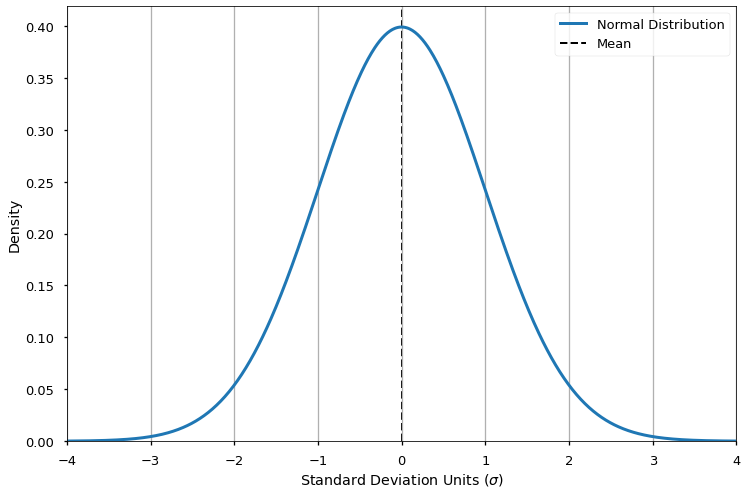

In [6]:
def plot_normal(
        x=None, 
        y=None, 
        mean=0, 
        std=1, 
        label='Normal Distribution'):
    """Plots x, y (normal distrubtion)."""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4, 4, .01)
    if y is None:
        y = stats.norm.pdf(x, loc=mean, scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(12,8))
    ax.plot(x, y, lw=3, label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean, color='k', label='Mean', lw=2, ls='--', zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units ($\sigma$)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig, ax

plot_normal();

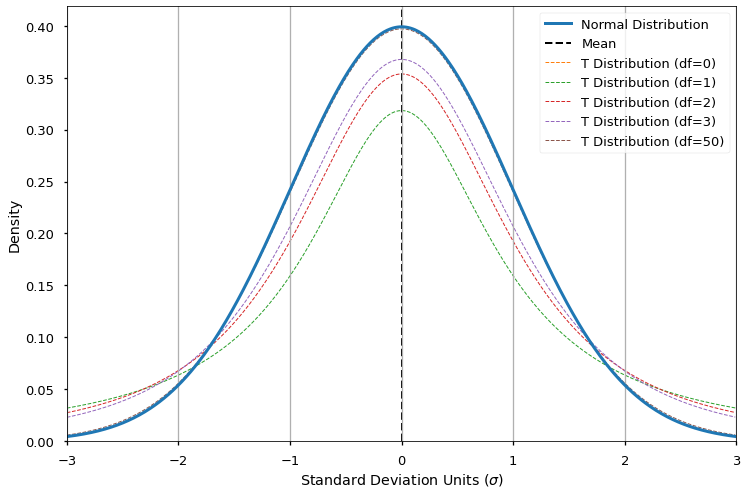

In [7]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig, ax = plot_normal(x, y)

## Adding T-Distribution 
for degrees_freedom in [0,1,2,3,50]:
    y_T = stats.t.pdf(x, df=degrees_freedom)
    ax.plot(
        x, y_T, zorder=-1, ls='--', lw=1, 
        label=f'T Distribution (df={degrees_freedom})'
    )
    
ax.legend();

# Additional Resources
- <a href='https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/'>*Analytics Vidhya - Z-Test / T-Test*</a>